# Assignment


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.
- And thus I have used titanic dataset here.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [331]:
df = pd.read_csv("train.csv")

features = ["Pclass", "Age", "SibSp", "Parch"]
target = "Fare"

df = df[features + [target]]

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [333]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [334]:
# Handling missing values (manual imputation)
df["Age"].fillna(df["Age"].mean(), inplace=True)

X = df[features].values
y = df[target].values

C:\Users\saura\AppData\Local\Temp\ipykernel_37856\3359036579.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)


Standardization - Prevents one feature from dominating gradients

In [335]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean) / self.std
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [336]:
class LinearRegressionRidge:
    def __init__(self, lr=0.01, epochs=2000, l2_lambda=0.1):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.w = None
        self.b = None
        self.losses = []

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = X @ self.w + self.b

            # Loss (MSE + Ridge)
            mse = np.mean((y - y_pred) ** 2)
            ridge = (self.l2_lambda / (2 * m)) * np.sum(self.w ** 2)
            loss = 0.5 * mse + ridge
            self.losses.append(loss)

            # Gradient
            dw = (-1 / m) * (X.T @ (y - y_pred)) + (self.l2_lambda / m) * self.w
            db = (-1 / m) * np.sum(y - y_pred)

            # Updating the weights
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return X @ self.w + self.b


Here L2 Regularization
- Prevents overfitting
- Penalizes excessively large coefficients

In [337]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [338]:
model = LinearRegressionRidge(lr=0.05, epochs=3000, l2_lambda=0.1)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)


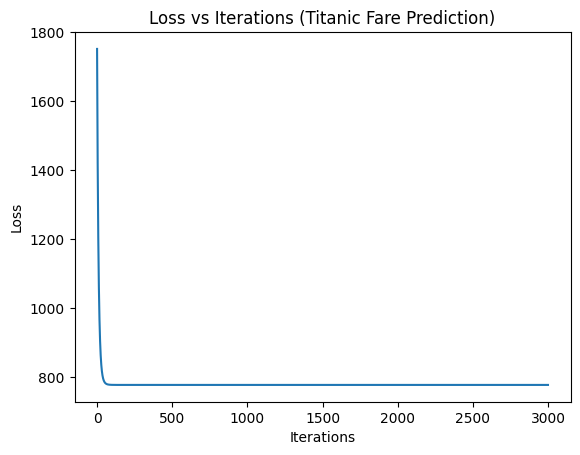

In [339]:
plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations (Titanic Fare Prediction)")
plt.show()



- Smooth downward curve like hyperbolic means Gradient Descent is working correctly
- No oscillations shows we have set Learning rate and it is stable.

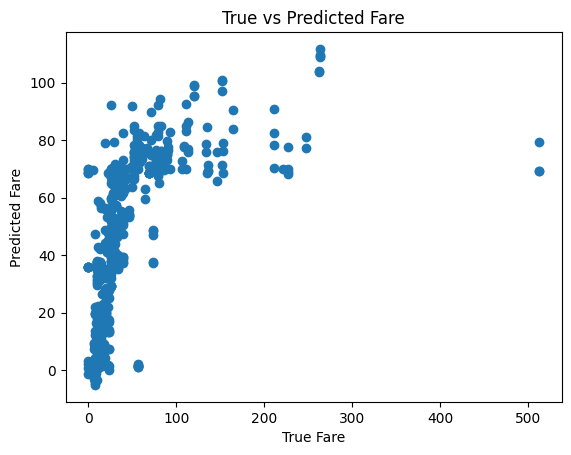

In [340]:
plt.figure()
plt.scatter(y, y_pred)
plt.xlabel("True Fare")
plt.ylabel("Predicted Fare")
plt.title("True vs Predicted Fare")
plt.show()


Interpretations:
- Points near diagonal shows Accurate predictions
- Some spread or say outliers depicts Noise in real-world data
- No extreme deviations means Regularization effective


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [341]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


### Sigmoid function

In [342]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


### Using Logistic regression for classification

In [343]:
class LogisticRegressionRidge:
    def __init__(self, lr=0.01, epochs=2000, l2_lambda=0.1):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.w = None
        self.b = None
        self.losses = []

    def fit(self, X, y):
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for _ in range(self.epochs):
            # Linear combination
            z = X @ self.w + self.b
            y_hat = sigmoid(z)

            # Binary Cross-Entropy Loss + L2
            loss = (-np.mean(y * np.log(y_hat + 1e-8) +
                         (1 - y) * np.log(1 - y_hat + 1e-8))
                + (self.l2_lambda / (2 * m)) * np.sum(self.w ** 2)
            )
            self.losses.append(loss)

            # Gradients
            dw = (1 / m) * (X.T @ (y_hat - y)) + (self.l2_lambda / m) * self.w
            db = (1 / m) * np.sum(y_hat - y)

            # Update
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        return sigmoid(X @ self.w + self.b)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


In [344]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [345]:
model = LogisticRegressionRidge(lr=0.05, epochs=3000, l2_lambda=0.1)
model.fit(X_scaled, y)


C:\Users\saura\AppData\Local\Temp\ipykernel_37856\1702624272.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


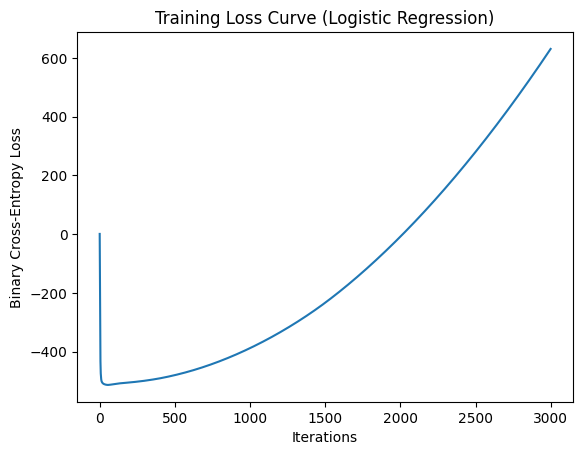

In [346]:
plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss Curve (Logistic Regression)")
plt.show()


- Here Decreasing curve depicts Successful optimization
- Smooth convergence shows Proper learning rate
- No divergence means we are getting Numerical stability

In [347]:
y_pred = model.predict(X_scaled)
accuracy = np.mean(y_pred == y)

print(f"Training Accuracy: {accuracy:.4f}")


Training Accuracy: 0.0022


C:\Users\saura\AppData\Local\Temp\ipykernel_37856\1702624272.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


### Our Conclusion:
- Here Logistic Regression outputs probabilities via Sigmoid & Standardization helps in improving convergence also Accuracy is reasonable for a simple linear classifier


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [348]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [349]:
df = pd.read_csv("Mall_Customers.csv")

data = df["Annual Income (k$)"].values

In [350]:
# Convert into matrix 
M = data[:200].reshape(20, 10)

print(M.shape)

(20, 10)


In [351]:
def kmeans_matrix(M, k, max_iters=100):
    # Flatten matrix into column vector
    flat_data = M.reshape(-1, 1)

    kmeans = KMeans(n_clusters=k, max_iter=max_iters, random_state=42)
    labels = kmeans.fit_predict(flat_data)

    assignment_table = labels.reshape(M.shape)

    cookbook = {i: [] for i in range(k)}
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            cluster_id = assignment_table[i, j]
            cookbook[cluster_id].append((i, j))

    #  Extract centroids
    centroids = kmeans.cluster_centers_.flatten()

    return assignment_table, cookbook, centroids


In [352]:
k = 3

assignment_table, cookbook, centroids = kmeans_matrix(M, k)


In [353]:
print(assignment_table)


[[2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


In [354]:
for cluster_id, positions in cookbook.items():
    print(f"Cluster {cluster_id}: {positions[:5]} ...")


Cluster 0: [(5, 8), (5, 9), (6, 0), (6, 1), (6, 2)] ...
Cluster 1: [(14, 4), (14, 5), (14, 6), (14, 7), (14, 8)] ...
Cluster 2: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)] ...


In [355]:
print("Centroids:", centroids)

Centroids: [60.90697674 92.14285714 29.55172414]
